In [ ]:
import pandas as pd

# Load the dataset
file_path = 'balanced-lyrics-for-genre-and-mood2.csv'
lyrics_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
lyrics_data.head()


,title,artist,genius_id,video_id,genres_self,genres_genius,recording_ids,selected_mbid,mood,genres_mb,genres_ab,lyrics,final_genres,final_mood,merged_labels
0,(Drawing) Rings Around the World,Super Furry Animals,820634,-i2Kn-EXh_A,['rock'],pop,['d0ee5f7b-cf80-4f2d-8170-f288450cdd77'],d0ee5f7b-cf80-4f2d-8170-f288450cdd77,['relaxed'],"[('4', 'indie rock'), ('3', 'rock'), ('2', 'in...",NaN,You expose the film in me\nWe're drawing rings...,"['electronic', 'rock']",happy/celebration/party/dance,"['electronic', 'rock', 'happy/celebration/part..."
1,The Bitter End,Placebo,453094,-JJAXwAaA2w,['rock'],rock,"['3d76b996-e1fd-45e9-bfa4-82938799a9e8', '62ca...",3d76b996-e1fd-45e9-bfa4-82938799a9e8,['relaxed'],"[('4', 'rock'), ('3', 'indie rock'), ('2', 'al...",NaN,[Verse 1]\nSince we're feeling so anaesthetise...,['rock'],loss/sad/heartbreak/angst/protest,"['rock', 'loss/sad/heartbreak/angst/protest']"
2,Stellar (acoustic),Incubus,337741,-nqRkAsZumc,['rock'],rock,"['0b3773b6-771b-4da8-ab0e-c2810fb57dbb', '10b6...",0b3773b6-771b-4da8-ab0e-c2810fb57dbb,['sad'],"[('3', 'alternative rock'), ('2', 'rock'), ('1...",['Rock'],[Intro]\n(You are stellar)\n\n[Verse 1]\nMeet ...,"['rock', 'funk&soul']",romantic/love/passion/devotion,"['rock', 'funk&soul', 'romantic/love/passion/d..."
3,Apply Some Pressure (radio edit),Maxïmo Park,332496,-Ue193sAcrE,['rock'],rock,['564198ac-e29d-47ea-beca-d862bc126cfd'],564198ac-e29d-47ea-beca-d862bc126cfd,"['happy', 'aggressive']","[('1', 'rock'), ('1', 'punk'), ('1', 'indie ro...",NaN,[Verse 1]\nYou know that I would love to see y...,['rock'],motivating/inspirational/uplifting/confidence/...,"['rock', 'motivating/inspirational/uplifting/c..."
4,American English,Idlewild,1728125,-_EprMTJPWA,['rock'],pop,"['471b19b8-78b5-47a1-a407-1f8ea8a27724', '905e...",471b19b8-78b5-47a1-a407-1f8ea8a27724,[],"[('2', 'rock'), ('2', 'indie rock'), ('1', 'pu...",['Alternative'],Songs when they're true are all dedicated to y...,['rock'],loss/sad/heartbreak/angst/protest,"['rock', 'loss/sad/heartbreak/angst/protest']"


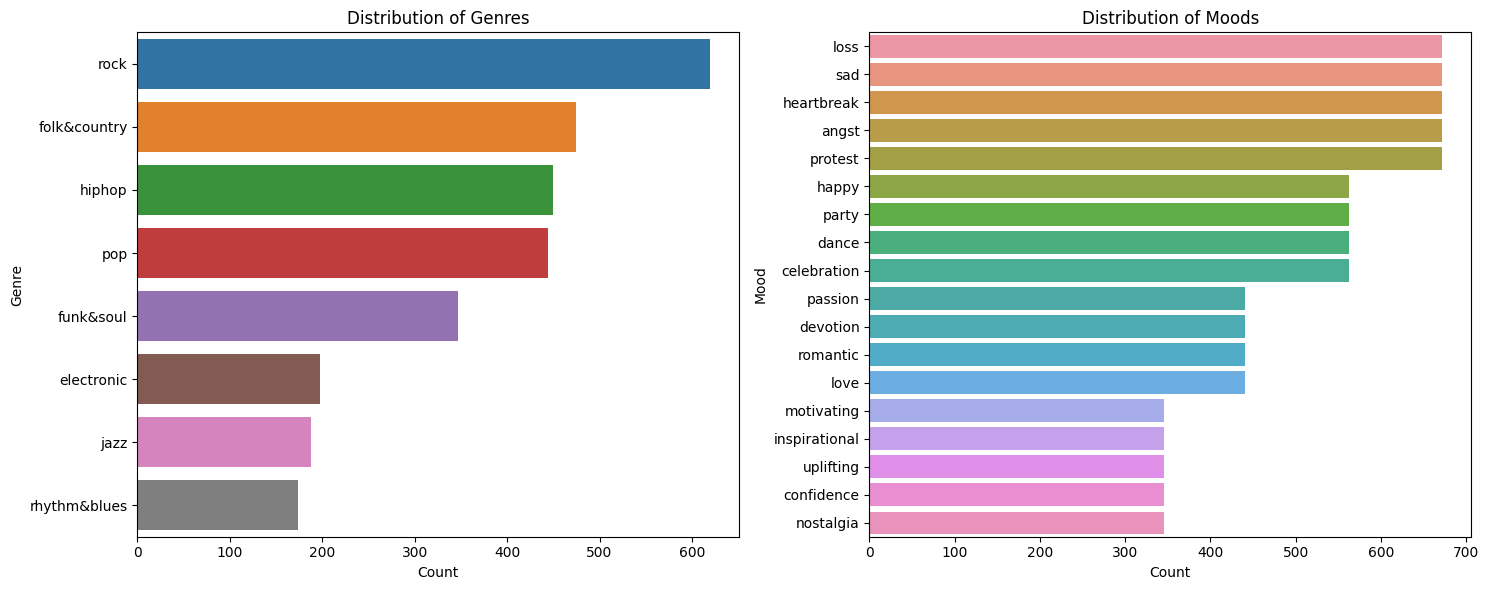

(count    2020.000000
 mean     1771.116832
 std      1027.091798
 min       321.000000
 25%      1037.000000
 50%      1512.500000
 75%      2274.250000
 max      7543.000000
 Name: lyrics_length, dtype: float64,
 {'electronic',
  'folk&country',
  'funk&soul',
  'hiphop',
  'jazz',
  'pop',
  'rhythm&blues',
  'rock'},
 {'angst',
  'celebration',
  'confidence',
  'dance',
  'devotion',
  'happy',
  'heartbreak',
  'inspirational',
  'loss',
  'love',
  'motivating',
  'nostalgia',
  'party',
  'passion',
  'protest',
  'romantic',
  'sad',
  'uplifting'})

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import numpy as np

# Convert string representations of lists to actual lists
lyrics_data['final_genres'] = lyrics_data['final_genres'].apply(literal_eval)
lyrics_data['final_mood'] = lyrics_data['final_mood'].apply(lambda x: x.split('/') if isinstance(x, str) else [])

# Extracting unique genres and moods
unique_genres = set(np.concatenate(lyrics_data['final_genres'].values))
unique_moods = set(np.concatenate(lyrics_data['final_mood'].values))

# Counting the occurrences of each genre and mood
genre_counts = lyrics_data['final_genres'].explode().value_counts()
mood_counts = lyrics_data['final_mood'].explode().value_counts()

# Plotting the distribution of genres and moods
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')

plt.subplot(1, 2, 2)
sns.barplot(x=mood_counts.values, y=mood_counts.index)
plt.title('Distribution of Moods')
plt.xlabel('Count')
plt.ylabel('Mood')

plt.tight_layout()
plt.show()

# Basic statistics for lyrics length
lyrics_data['lyrics_length'] = lyrics_data['lyrics'].str.len()
lyrics_length_stats = lyrics_data['lyrics_length'].describe()

lyrics_length_stats, unique_genres, unique_moods


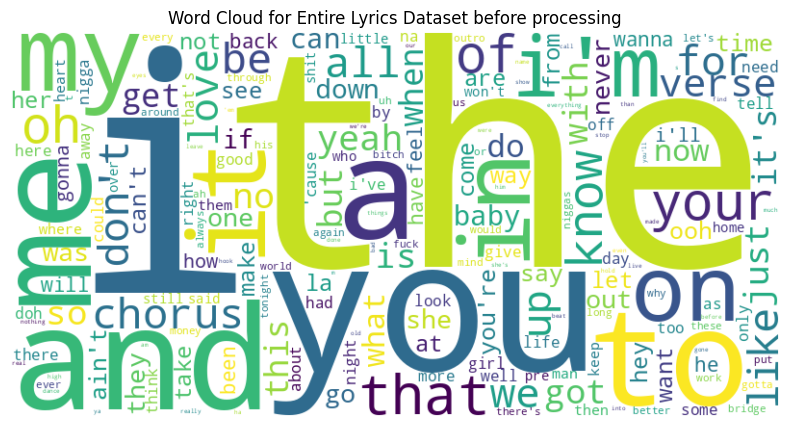

In [ ]:
# Combining all lyrics into one large string
all_lyrics_combined = ' '.join(lyrics_data['lyrics'])

# Get words from the combined lyrics of the entire dataset
all_lyrics_words = get_words_from_lyrics(all_lyrics_combined)

# Count the frequency of each word in the entire dataset
all_word_counts = Counter(all_lyrics_words)

# Generating a word cloud for the entire dataset
all_lyrics_wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(all_word_counts)

# Display the word cloud for the entire dataset
plt.figure(figsize=(10, 5))
plt.imshow(all_lyrics_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Entire Lyrics Dataset before processing')
plt.savefig("Word_Cloud_before_processing.png")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


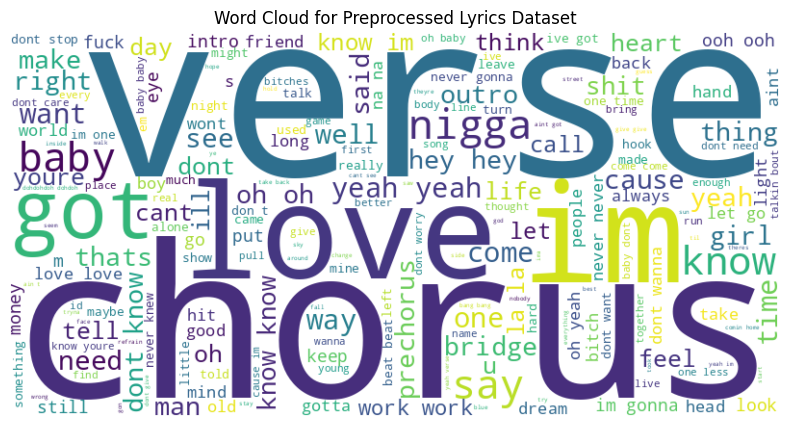

In [ ]:
from nltk.corpus import stopwords
import string
import re
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Adjusted preprocessing function without stopwords removal
def preprocess_lyrics(lyrics):
    lyrics = lyrics.lower()
    lyrics = re.sub(f'[{re.escape(string.punctuation)}]', '', lyrics)
    words = lyrics.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Applying the adjusted preprocessing to all lyrics
adjusted_preprocessed_lyrics = lyrics_data['lyrics'].apply(preprocess_lyrics)

# Combining adjusted preprocessed lyrics into one large string
combined_adjusted_preprocessed_lyrics = ' '.join(adjusted_preprocessed_lyrics)

# Generating a word cloud for the adjusted preprocessed lyrics
adjusted_lyrics_wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(combined_adjusted_preprocessed_lyrics)

# Display the word cloud for the adjusted preprocessed lyrics
plt.figure(figsize=(10, 5))
plt.imshow(adjusted_lyrics_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Preprocessed Lyrics Dataset')
plt.savefig("Word_Cloud_for_Preprocessed_Lyrics.png")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from collections import Counter

# Function to process genre data
def process_genre_data(genre_column):
    genre_list = []
    for genres in genre_column.dropna():
        genres = literal_eval(genres)
        for genre in genres:
            genre_list.append(genre)
    return genre_list

# Process final_genres data
genre_data = process_genre_data(lyrics_data['final_genres'])

# Count genres
genre_counts = Counter(genre_data)

# Prepare data for visualization
genre_labels, genre_values = zip(*genre_counts.items())

# Create Genre Distribution plot
plt.figure(figsize=(12, 6))
sns.barplot(list(genre_labels), list(genre_values))
plt.xticks(rotation=45)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()


ValueError: ignored

In [ ]:
# Counting the occurrences of each unique mood label as a whole
final_mood_counts = lyrics_data['final_mood'].value_counts()

# Prepare data for visualization
final_mood_labels = final_mood_counts.index
final_mood_values = final_mood_counts.values

# Create Mood Distribution plot without separating moods
plt.figure(figsize=(12, 6))
sns.barplot(x=final_mood_labels, y=final_mood_values)
plt.xticks(rotation=45)
plt.title("Mood Distribution (Unseparated Labels)")
plt.xlabel("Moods")
plt.ylabel("Count")
plt.show()



TypeError: ignored

<Figure size 1200x600 with 0 Axes>